In [22]:
import joblib

import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as model_selection

from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [23]:
NUM_COLS = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [24]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('lottery.csv')
df.describe()

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
count,6990.000000,6990.000000,6990.000000,6990.000000,6990.000000,6990.000000,6990.000000,6990.000000,6990.000000,6990.000000
mean,10.438054,10.598712,10.603720,10.572246,10.628326,10.534621,10.540486,10.614878,10.535336,10.540200
std,3.300660,3.311107,3.330687,3.307380,3.297488,3.315592,3.298262,3.347206,3.332243,3.274581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,10.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,10.000000,10.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,26.000000,22.000000,22.000000,24.000000,28.000000,24.000000,23.000000,23.000000,24.000000,24.000000


In [25]:
# Loại bỏ các hàng có tất cả các cột từ zero đến nine đều bằng 0
df = df[df.iloc[:, 1:].all(axis=1)]
df.describe()

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
count,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000
mean,10.562192,10.740070,10.745144,10.713250,10.770078,10.675123,10.681067,10.756451,10.675848,10.680777
std,3.081179,3.096977,3.117950,3.094163,3.080839,3.104785,3.085753,3.135314,3.122765,3.060102
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,9.000000
50%,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,26.000000,22.000000,22.000000,24.000000,28.000000,24.000000,23.000000,23.000000,24.000000,24.000000


In [26]:
# Chuẩn bị dữ liệu
X = df.drop(columns=['Date']).values
y = df[NUM_COLS].values

In [27]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Chuẩn hóa dữ liệu bằng scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Reshape lại dữ liệu để phù hợp với input của mạng LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [30]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(10))
model.compile(loss='mse', optimizer='adam')

In [31]:
# Huấn luyện mô hình
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=2)

Epoch 1/100
345/345 - 4s - loss: 53.1540 - val_loss: 9.7007 - 4s/epoch - 10ms/step
Epoch 2/100
345/345 - 1s - loss: 9.6096 - val_loss: 9.5411 - 797ms/epoch - 2ms/step
Epoch 3/100
345/345 - 1s - loss: 9.5800 - val_loss: 9.5420 - 762ms/epoch - 2ms/step
Epoch 4/100
345/345 - 1s - loss: 9.5605 - val_loss: 9.4983 - 507ms/epoch - 1ms/step
Epoch 5/100
345/345 - 0s - loss: 9.5278 - val_loss: 9.4596 - 482ms/epoch - 1ms/step
Epoch 6/100
345/345 - 1s - loss: 9.4868 - val_loss: 9.4108 - 512ms/epoch - 1ms/step
Epoch 7/100
345/345 - 1s - loss: 9.4093 - val_loss: 9.2994 - 542ms/epoch - 2ms/step
Epoch 8/100
345/345 - 0s - loss: 9.2510 - val_loss: 9.0956 - 481ms/epoch - 1ms/step
Epoch 9/100
345/345 - 1s - loss: 8.9219 - val_loss: 8.6492 - 509ms/epoch - 1ms/step
Epoch 10/100
345/345 - 1s - loss: 8.3097 - val_loss: 7.8561 - 590ms/epoch - 2ms/step
Epoch 11/100
345/345 - 1s - loss: 7.2971 - val_loss: 6.5914 - 714ms/epoch - 2ms/step
Epoch 12/100
345/345 - 1s - loss: 5.7709 - val_loss: 4.8350 - 738ms/epoch -

In [32]:
# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test Loss: {loss}')

Test Loss: 0.009889934211969376


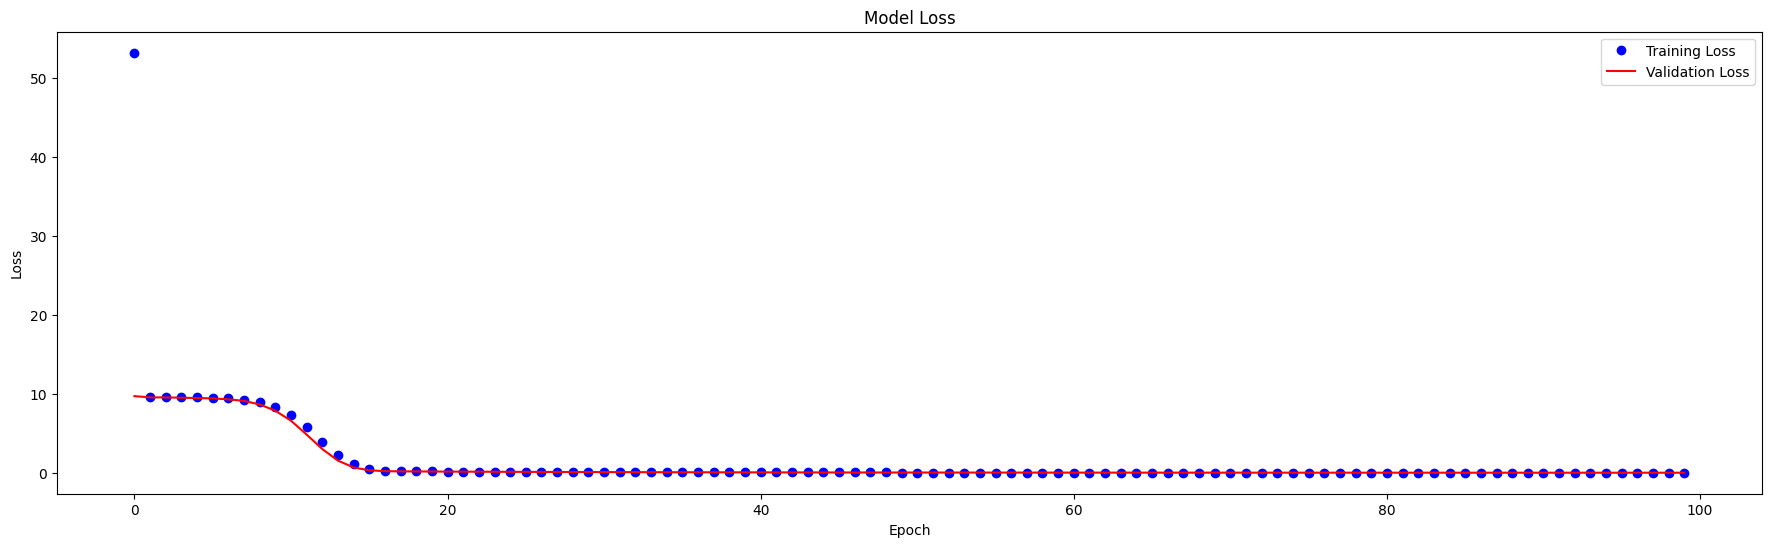

In [33]:
# Vẽ biểu đồ loss
plt.figure(figsize=(22, 6))
plt.plot(history.history['loss'],'bo', label='Training Loss')
plt.plot(history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [34]:
# Lưu mô hình và scaler
model.save('lottery.keras')
joblib.dump(scaler, 'scaler.gz')

['scaler.gz']

In [35]:
# Nhập ngày cần lấy dữ liệu
ngay = '2024-02-20'

In [36]:
# Tạo dictionary giữa các cột từ zero đến nine và dự đoán tương ứng
row_scaled = scaler.transform(df.loc[df['Date'] == ngay, 'Zero':'Nine'].values)
predictions_dict = {col_name: prediction for col_name, prediction in zip(NUM_COLS, model.predict(row_scaled.reshape((row_scaled.shape[0], 1, row_scaled.shape[1])))[0])}
predictions_dict

1/1 [==============================] - 0s 306ms/step


{'Zero': 13.0759115,
 'One': 8.913889,
 'Two': 10.03116,
 'Three': 14.099541,
 'Four': 7.9368243,
 'Five': 9.974471,
 'Six': 9.978813,
 'Seven': 14.139644,
 'Eight': 10.073582,
 'Nine': 8.873889}

In [37]:
# Kết quả dự đoán cao nhất và thấp nhất
predictions_items = predictions_dict.items()
print(f'''Cặp số có giá trị dự đoán cao nhất: {dict(sorted(predictions_items, key=lambda x: x[1], reverse=True)[:2])}
Cặp số có giá trị dự đoán thấp nhất: {dict(sorted(predictions_items, key=lambda x: x[1])[:2])}''')

Cặp số có giá trị dự đoán cao nhất: {'Seven': 14.139644, 'Three': 14.099541}
Cặp số có giá trị dự đoán thấp nhất: {'Four': 7.9368243, 'Nine': 8.873889}
